# Exercise 2.5

Book | Reinforcement learning : an introduction, Richard S. Sutton and Andrew G. Barto, Second edition. | Cambridge, MA : The MIT Press, [2018] |

## Description Exercise 2.5 (programming):
Design and conduct an experiment to demonstrate the difficulties that sample
average methods have for non-stationary problems. Use a modified version of the
10-armed testbed in which all the q⇤(a) start out equal and then take
independent random walks (say by adding a normally distributed increment with
mean 0 and standard deviation 0.01 to all the q⇤(a) on each step). Prepare
plots like Figure 2.2 for an action-value method using sample averages,
incrementally computed, and another action-value method using a constant
step-size parameter, alpha = 0.1. Use epsilon = 0.1 and longer runs, say of
10,000 steps.

<img src="images/a_simple_bandit_algorithm.png" alt="A simple bandit algorithm, page 32" width="600"/>

<img src="images/Figure_2_2_page_29.png" alt="Figure 2.2 Average performance of epsilon-greedy action-value methods on the 10-armed testbed." width="600"/>

## Inputs

- runs: number of iterations of all timesteps
- timesteps: number of iteration within one run
- bandit_actions: number of arms of the bandit
- q_drift_mean: mean of the step-wise normally distributed increment of the action value
- q_drift_std_dev: standard deviation of the step-wise normally distributed increment of the action value
- epsilon: probability of exploration

## Outputs

 - average loss per timestep across all runs per agent
 - average reward per timestep across all runs per agent
 - cumulative average reward per timestep across all runs per agent
 - average of percentage of optimal action taken per timestep across all runs per agent


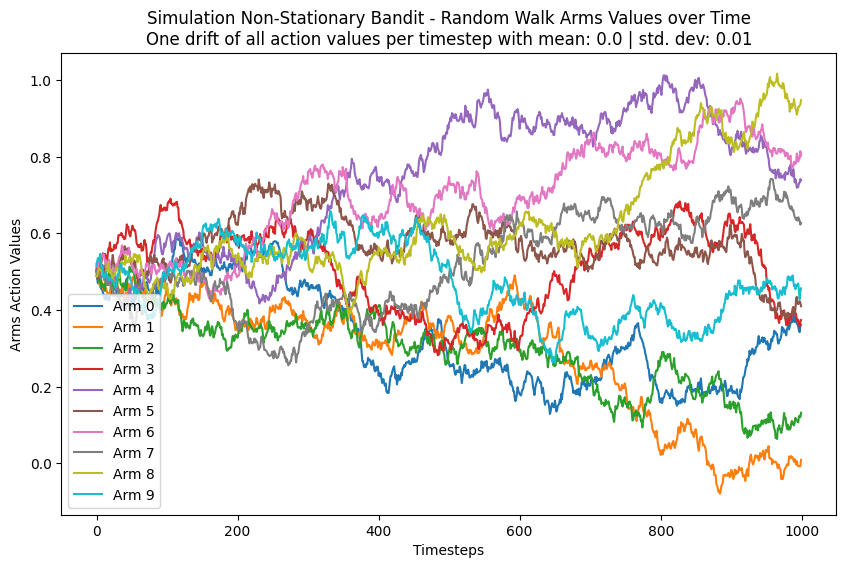

In [4]:
"""
Simulation randomwalk of bandit's arms
"""
# TODO adapt to class karmedbandit:BanditEnv
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

# configuration
competition_config = {"runs": 1_000, "timesteps": 1_000}
bandit_config = {"bandit_actions": 10, "initial_action_value": 0.5,
                 "q_drift_mean": 0.0, "q_drift_std_dev": 0.01,
                 "stationary": False, "random_seed": None}
save_plot = False
path = "plots"

# simulation randomwalk bandit arms
arms = np.full(bandit_config["bandit_actions"], bandit_config["initial_action_value"])
log_file_arms = np.zeros((competition_config["timesteps"], bandit_config["bandit_actions"]))

for timestep in range(competition_config["timesteps"]):
    increments = np.random.normal(bandit_config["q_drift_mean"], bandit_config["q_drift_std_dev"], arms.shape)
    arms += increments
    log_file_arms[timestep,] = arms

# Get the current timestamp
timestamp = datetime.now().strftime("%Y%m%d_%I_%M_%S_%p")

# Plot log_file_arms
plt.figure(figsize=(10, 6))
for arm in range(log_file_arms.shape[1]):
    plt.plot(log_file_arms[:, arm], label=f'Arm {arm}')
plt.title(f'Simulation Non-Stationary Bandit - Random Walk Arms Values over Time\nOne drift of all action values per timestep with mean: {bandit_config["q_drift_mean"]} | std. dev: {bandit_config["q_drift_std_dev"]}')
plt.xlabel('Timesteps')
plt.ylabel('Arms Action Values')
plt.legend()
if save_plot:
    if not os.path.exists(path):
        os.makedirs(path)
    plt.savefig(f'{path}/simulation_non_stationary_bandit_{timestamp}.png', bbox_inches='tight')
    print(f'Plot Simulation Non-Stationary Bandit saved to {path}/simulation_non_stationary_bandit_{timestamp}.png')
plt.show()

In [6]:
"""
Experiment with three different players plus the cheater (best arm with max reward)
"""
from karmedbanditexperiment import BanditCompetition

# Configurations
competition_config = {"runs": 1_000, "timesteps": 1_000}
bandit_config = {"bandit_actions": 10, "initial_action_value": 0.5,
                 "q_drift_mean": 0.0, "q_drift_std_dev": 0.01,
                 "stationary": False, "random_seed": None}
agent_configs = {
    "cheater": {"epsilon": 1., "alpha": 1., "random_seed": None},
    "constant stepsize": {"epsilon": 0.1, "alpha": 0.1, "random_seed": None},
    "sample average": {"epsilon": 0.1, "alpha": 0., "random_seed": None},
    "random explore": {"epsilon": 1., "alpha": 0., "random_seed": None}
}

experiment = BanditCompetition(competition_config, bandit_config, agent_configs, system_load=0.3)
rewards, loss, optimal_actions = experiment.run_experiment()
# experiment.plot_results(rewards, loss, optimal_actions, save_plots=False)

# runtime @ ThinkPad: 3m 9s | 2400 total runs from 16 batches with 150 runs each.
# runtime @ Drachenturm: m s | 2400 total runs from 6 batches with 400 runs each.

996 total runs from 6 batches with 166 runs each.


2400 total runs from 6 batches with 400 runs each.


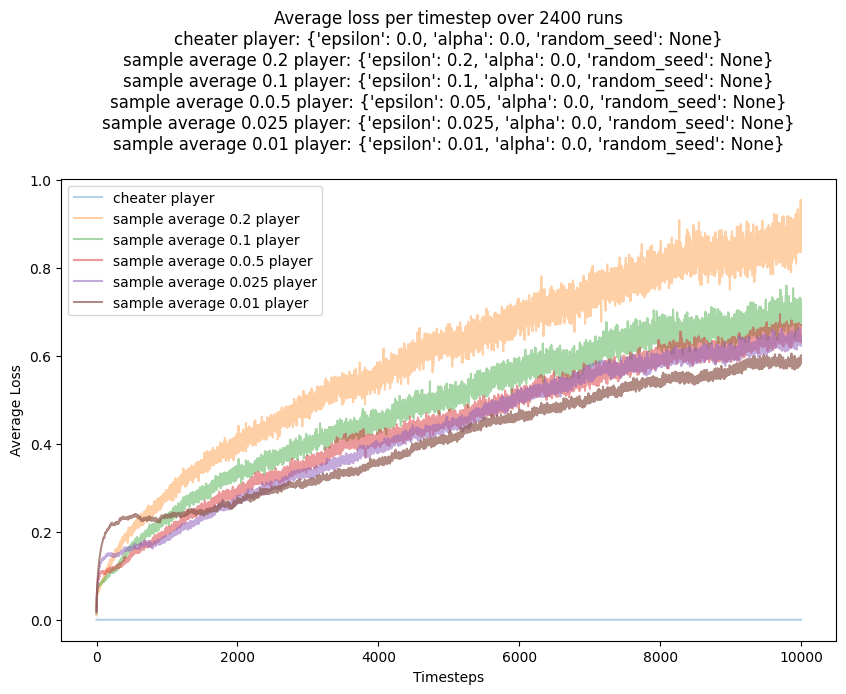

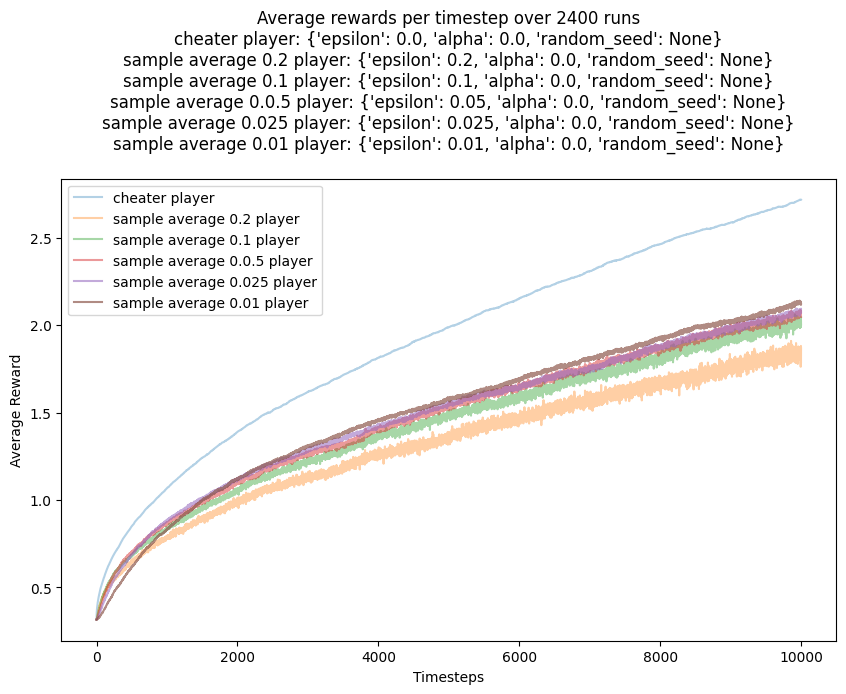

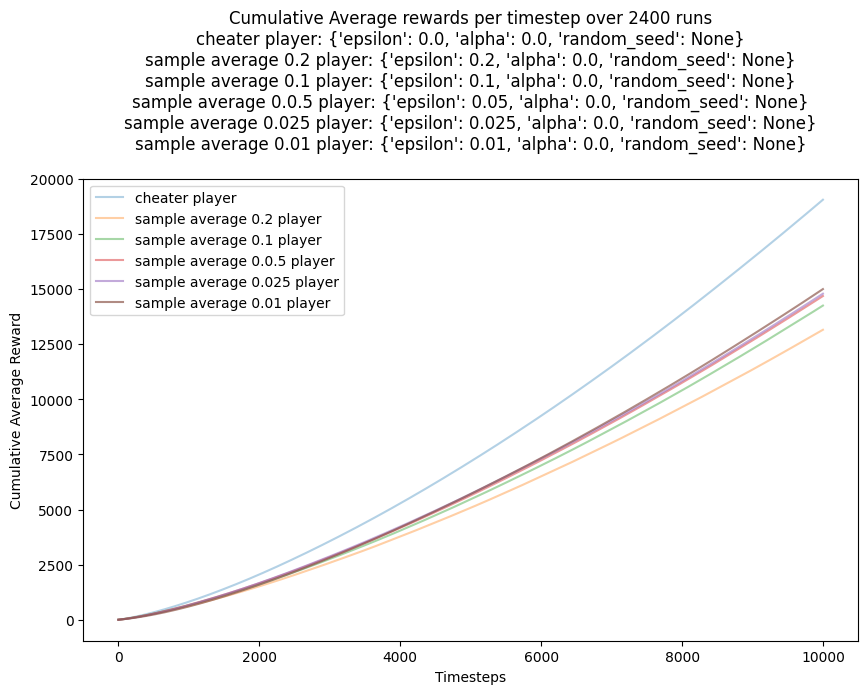

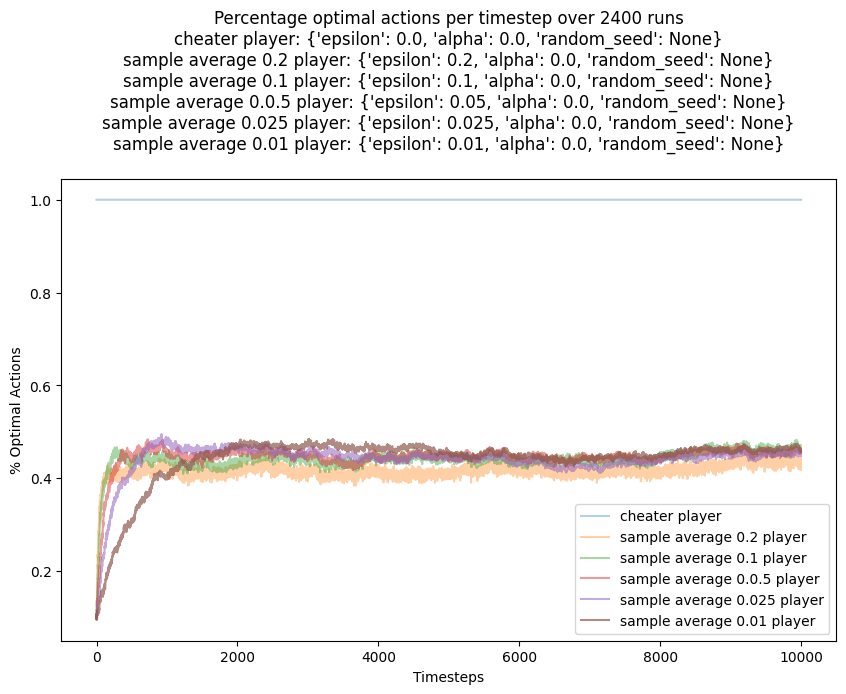

In [1]:
"""
Experiment with five different sample average players with different epsilon plus the cheater (best arm with max reward)
"""
from karmedbanditexperiment import BanditCompetition

# Configurations
competition_config = {"runs": 2_400, "timesteps": 10_000}
bandit_config = {"bandit_actions": 10, "initial_action_value": 0.5,
                 "q_drift_mean": 0.0, "q_drift_std_dev": 0.01,
                 "stationary": False, "random_seed": None}
agent_configs = {
    "cheater": {"epsilon": 0., "alpha": 0., "random_seed": None},
    "sample average 0.2": {"epsilon": 0.2, "alpha": 0., "random_seed": None},
    "sample average 0.1": {"epsilon": 0.1, "alpha": 0., "random_seed": None},
    "sample average 0.0.5": {"epsilon": 0.05, "alpha": 0., "random_seed": None},
    "sample average 0.025": {"epsilon": 0.025, "alpha": 0., "random_seed": None},
    "sample average 0.01": {"epsilon": 0.01, "alpha": 0., "random_seed": None}
}

experiment = BanditCompetition(competition_config, bandit_config, agent_configs, system_load=0.3)
rewards, loss, optimal_actions = experiment.run_experiment()
experiment.plot_results(rewards, loss, optimal_actions, save_plots=False)

# runtime @ ThinkPad: 7m 53s | 2400 total runs from 16 batches with 150 runs each.
# runtime @ ThinkPad: 8m 46s | 2400 total runs from 6 batches with 400 runs each.

240 total runs from 6 batches with 40 runs each.


Runs: 100%|██████████| 40/40 [00:02<00:00, 16.02it/s]


Plot Average loss per timestep over 240 runs saved to plots/average_loss_all_runs20250126_07_20_45_PM.png


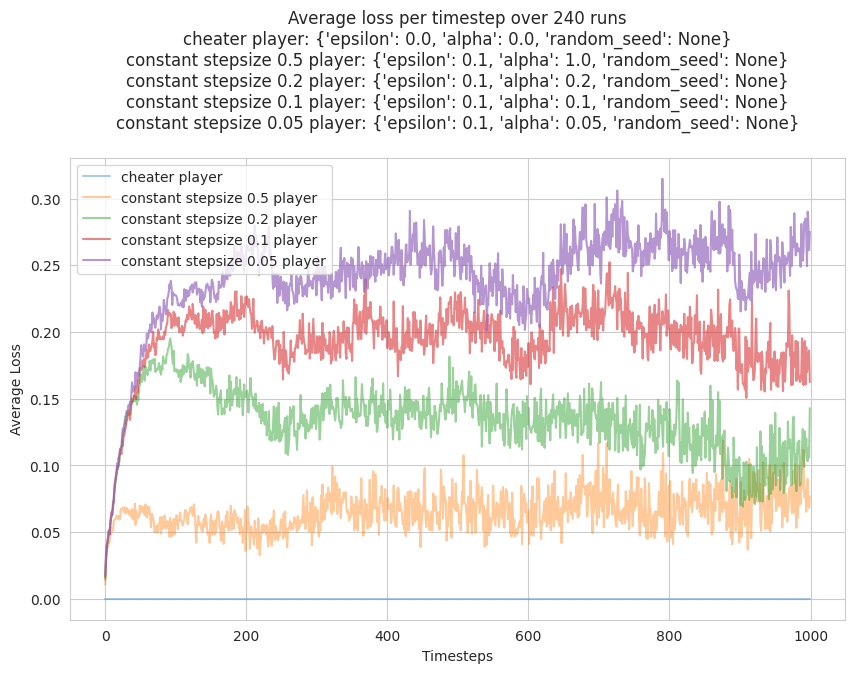

Plot Average rewards per timestep over 240 runs saved to plots/average_rewards_all_runs20250126_07_20_45_PM.png


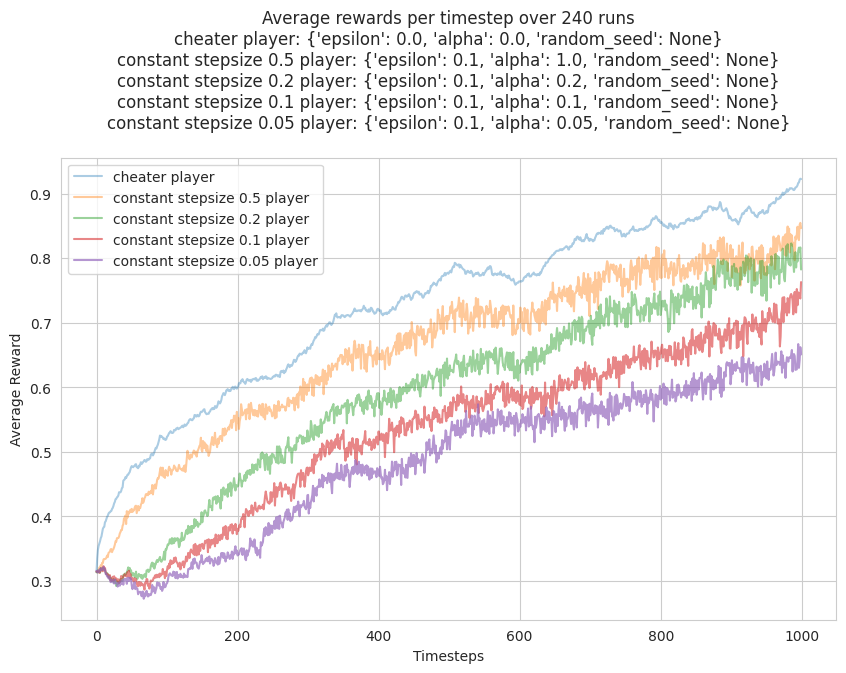

Plot Cumulative Average rewards per timestep over 240 runs saved to plots/average_rewards_all_runs20250126_07_20_45_PM.png


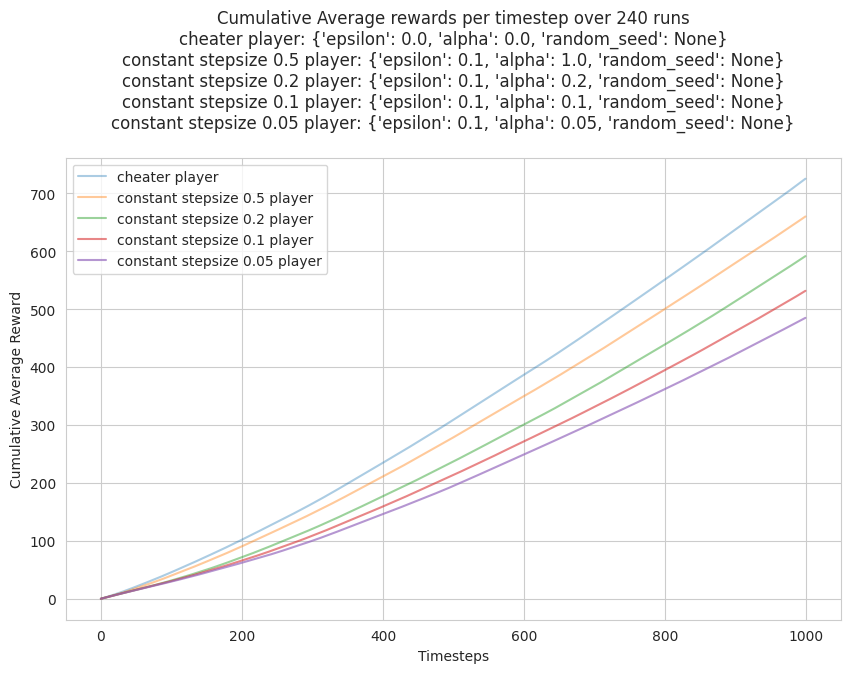

(Plot Percentage optimal actions per timestep over 240 runs saved to plots/percentage_optimal_actions_all_runs20250126_07_20_45_PM.png)


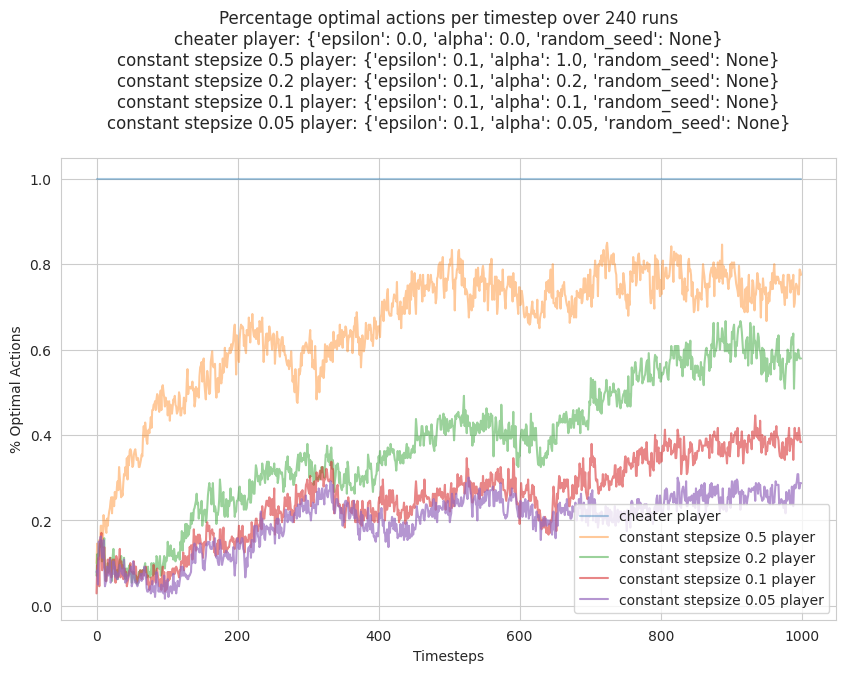

In [5]:
"""
Experiment with five different constant stepsize players with different alpha plus the cheater (best arm with max reward)
First observation: results depend on the ratio of epsilon and alpha
"""
from karmedbanditexperiment import BanditCompetition

# Configurations
competition_config = {"runs": 2_40, "timesteps": 10_00}
bandit_config = {"bandit_actions": 10, "initial_action_value": 0.5,
                 "q_drift_mean": 0.0, "q_drift_std_dev": 0.01,
                 "stationary": False, "random_seed": None}
agent_configs = {
    "cheater": {"epsilon": 0., "alpha": 0., "random_seed": None},
    "constant stepsize 1.0": {"epsilon": 0.1, "alpha": 1., "random_seed": None},
    "constant stepsize 0.2": {"epsilon": 0.1, "alpha": 0.2, "random_seed": None},
    "constant stepsize 0.1": {"epsilon": 0.1, "alpha": 0.1, "random_seed": None},
    "constant stepsize 0.05": {"epsilon": 0.1, "alpha": 0.05, "random_seed": None},
}

experiment = BanditCompetition(competition_config, bandit_config, agent_configs, system_load=0.8)
rewards, loss, optimal_actions = experiment.run_experiment()
experiment.plot_results(rewards, loss, optimal_actions, save_plots=True)

# runtime @ ThinkPad: 3m 9s | 2400 total runs from 16 batches with 150 runs each.
# runtime @ Drachenturm:  | 2400 total runs from 6 batches with 400 runs each.